<a href="https://colab.research.google.com/github/Phirat-Passi/Image-Segmentation-ML-Model/blob/main/Background_Processor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Background Image Processing Model
-> Developed by Phirat Passi

In [2]:
#Installing OpenVINO toolkit version for Google colaboratory platform
!pip install openvino-colab
#Importing the U2Net Model
!git clone https://github.com/xuebinqin/U-2-Net.git 
!pip install PyTorch
#Toolkit facilitating the optimization of a deep learning model from a framework and deployment using an inference engine
!pip install openvino

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'U-2-Net' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  ERROR: Failed building wheel for PyTorch
  Running setup.py clean for PyTorch
Failed to build PyTorch
    Running setup.py install for PyTorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-jzgza0ve/pytorch_6e88ff6931ec4dd2989f4e2c987dc98f/setup.py'"'"'; __file__='"'"'/tmp/pip-install-jzgza0ve/pytorch_6e88ff6931ec4dd2989f4e2c987dc98f/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close(

In [3]:
# Updating the platform commands for proper functioning of Model 
!apt-get update && apt-get upgrade -y &&\
     apt-get autoremove -y
!sudo apt install -y --no-install-recommends \
      build-essential \
      cpio \
       curl \
      git \
       lsb-release \
       pciutils \
       python3.6 \
       python3-pip \
       sudo \
       libusb-1.0-0 libboost-program-options1.62.0 \
       libboost-thread1.62.0 libboost-filesystem1.62.0 \
       libssl1.0.0 libudev1 libjson-c3 usbutils udev wget

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [902 kB]
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:14 

In [4]:
# Setup for the U-2-Net Model

%cd /content
!/usr/local/cuda/bin/nvcc --version
!git clone https://github.com/shreyas-bk/U-2-Net
%cd /content/U-2-Net
print('making images directory')
!mkdir images
print('making results directory')
!mkdir results
print('importing...')
from google.colab import files
import os
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from PIL import Image as Img
import cv2
from google.colab.patches import cv2_imshow
print('Done!')

/content
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
fatal: destination path 'U-2-Net' already exists and is not an empty directory.
/content/U-2-Net
making images directory
making results directory
importing...
Done!


In [5]:
# Importing OpenVino toolkit
!git clone https://github.com/openvinotoolkit/openvino_notebooks.git

Cloning into 'openvino_notebooks'...
remote: Enumerating objects: 2928, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 2928 (delta 36), reused 49 (delta 14), pack-reused 2830
Receiving objects: 100% (2928/2928), 201.41 MiB | 32.08 MiB/s, done.
Resolving deltas: 100% (1694/1694), done.
Checking out files: 100% (262/262), done.


In [36]:
# Requirements for OpenVINO
!pip install openvino-dev[onnx,tensorflow2]==2022.1.0
!pip install gdown
!pip install pytube
!pip install yaspin

!pip install fastseg
!pip install ipywidgets
!pip install torch>=1.5.1 
!pip install torchvision>=0.6.1
!pip install requests~=2.23.0
!pip install tornado~=5.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached requests-2.23.0-py2.py3-none-any.whl (58 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1
ERROR: pip's dependency resolver does not currently take into account all the packag

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tornado-5.1.1-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: tornado
    Found existing installation: tornado 6.2
    Uninstalling tornado-6.2:
      Successfully uninstalled tornado-6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclassic 0.4.3 requires tornado>=6.1, but you have tornado 5.1.1 which is incompatible.
jupyterlab 3.4.4 requires tornado>=6.1.0, but you have tornado 5.1.1 which is incompatible.
jupyter-server 1.18.1 requires tornado>=6.1.0, but you have tornado 5.1.1 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 5.5.6 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.16.3 which is incompatible.


In [7]:
# Setting-Up ONNX Framework Development environment with Tensorflow
%%writefile requirements.txt
openvino-dev[onnx,tensorflow2]==2022.1.0
gdown
pytube
yaspin

# PyTorch/ONNX notebook requirements
fastseg
ipywidgets

torch>=1.5.1,<=1.7.1; sys_platform == 'darwin'
torchvision>=0.6.1,<=0.8.2; sys_platform == 'darwin'
--find-links https://download.pytorch.org/whl/torch_stable.html
torch>=1.5.1+cpu,<=1.7.1+cpu; sys_platform =='linux' or platform_system == 'Windows'
torchvision>=0.6.1+cpu,<=0.8.2+cpu; sys_platform =='linux' or platform_system == 'Windows'
torchmetrics==0.6.2

# PaddlePaddle notebook requirements
# For 103 PaddlePaddle MO conversion tutorial and 206 PaddleGAN/AnimeGAN demo
paddlepaddle==2.2.*
paddlehub
# paddle2onnx 0.9.7 fails export in 206 and 207
paddle2onnx>=0.6, <=0.9.6
ppgan==2.1.*

# BERT quantization notebook requirements
transformers

# NNCF notebook requirements
nncf[tf, torch]
tensorflow_datasets==4.2.0

# CT scan training/inference requirements
monai
pytorch_lightning

# Jupyter requirements
jupyterlab

# The packages below are not directly required. They are dependencies of 
# other dependencies that are pinned to a specific version to avoid
# compatibility issues or vulnerabilities
geffnet==0.9.8
matplotlib<3.4
jedi==0.17.2
setuptools>=56.0.0
Pillow>=8.3.2
ipykernel==5.*
ipython==7.16.3 # not directly required, pinned to avoid a vulnerability
pygments>=2.7.4 # not directly required, pinned by Snyk to avoid a vulnerability
nltk>=3.6.4 # not directly required, pinned by Snyk to avoid a vulnerability
rsa>=4.7 # not directly required, pinned by Snyk to avoid a vulnerability
scikit-learn>=0.24.2 # not directly required, pinned by Snyk to avoid a vulnerability
paddlenlp==2.0.8 # workaround for "cannot import name '_C_ops'" error with paddlehub
nest-asyncio<=1.5.4
jupyter-client<=7.2.0

Overwriting requirements.txt


In [22]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
Ignoring torch: markers 'sys_platform == "darwin"' don't match your environment
Ignoring torchvision: markers 'sys_platform == "darwin"' don't match your environment


In [19]:
!pip3 install torch==1.4.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached https://download.pytorch.org/whl/cu92/torch-1.4.0%2Bcu92-cp37-cp37m-linux_x86_64.whl (640.6 MB)
  Using cached https://download.pytorch.org/whl/cu92/torchvision-0.4.0%2Bcu92-cp37-cp37m-manylinux1_x86_64.whl (8.8 MB)
INFO: pip is looking at multiple versions of <Python from Requires-Python> to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install torch==1.4.0+cu92 and torchvision==0.4.0+cu92 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested torch==1.4.0+cu92
    torchvision 0.4.0+cu92 depends on torch==1.2.0

To fix this you could try to:
1. loosen th

In [20]:
# IR (Information Retrieval) Model Setup
!pip install fasttext
!pip install ir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Task 1 : Background Removal


In [11]:
import os
import time
from collections import namedtuple
from pathlib import Path
import torch

import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
from IPython.display import HTML, FileLink, display
from model.u2net import U2NET, U2NETP
from openvino.runtime import Core

In [12]:
# Configuring Data storage directories
IMAGE_DIR = "data"
model_config = namedtuple("ModelConfig", ["name", "url", "model", "model_args"])

u2net_lite = model_config(
    name="u2net_lite",
    url="https://drive.google.com/uc?id=1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy",
    model=U2NETP,
    model_args=(),
)
u2net = model_config(
    name="u2net",
    url="https://drive.google.com/uc?id=1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ",
    model=U2NET,
    model_args=(3, 1),
)
u2net_human_seg = model_config(
    name="u2net_human_seg",
    url="https://drive.google.com/uc?id=1-Yg0cxgrNhHP-016FPdp902BR-kSsA4P",
    model=U2NET,
    model_args=(3, 1),
)

# Set u2net_model to one of the three configurations listed above
u2net_model = u2net_lite

In [13]:
# The filenames of the downloaded and converted models
MODEL_DIR = "model"
model_path = Path(MODEL_DIR) / u2net_model.name / Path(u2net_model.name).with_suffix(".pth")
onnx_path = model_path.with_suffix(".onnx")
ir_path = model_path.with_suffix(".xml")

In [14]:
# Determine Model Weights 
if not model_path.exists():
    import gdown

    os.makedirs(name=model_path.parent, exist_ok=True)
    print("Start downloading model weights file... ")
    with open(model_path, "wb") as model_file:
        gdown.download(url=u2net_model.url, output=model_file)
        print(f"Model weights have been downloaded to {model_path}")

Start downloading model weights file... 


Downloading...
From: https://drive.google.com/uc?id=1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy
To: <_io.BufferedWriter name='model/u2net_lite/u2net_lite.pth'>
100%|██████████| 4.68M/4.68M [00:00<00:00, 78.3MB/s]

Model weights have been downloaded to model/u2net_lite/u2net_lite.pth


In [15]:
# Load the model
net = u2net_model.model(*u2net_model.model_args)
net.eval()

# Load the weights
print(f"Loading model weights from: '{model_path}'")
net.load_state_dict(state_dict=torch.load(model_path, map_location="cpu"))

# Save the model if it doesn't exist yet
if not model_path.exists():
    print("\nSaving the model")
    torch.save(obj=net.state_dict(), f=str(model_path))
    print(f"Model saved at {model_path}")

Loading model weights from: 'model/u2net_lite/u2net_lite.pth'


In [16]:
!pip install timm==0.3.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 244 kB 8.3 MB/s 


In [38]:
#convert the pytorch u2net to onnx
if not onnx_path.exists():
    dummy_input = torch.randn(1, 3, 512, 512)
    torch.onnx.export(model=net, args=dummy_input, f=onnx_path, opset_version=11)
    print(f"ONNX model exported to {onnx_path}.")
else:
    print(f"ONNX model {onnx_path} already exists.")

ONNX model model/u2net_lite/u2net_lite.onnx already exists.


In [23]:
# Construct the command for Model Optimizer
# Set log_level to CRITICAL to suppress warnings that can be ignored for this demo
mo_command = f"""mo
                 --input_model "{onnx_path}"
                 --input_shape "[1,3, 512, 512]"
                 --mean_values="[123.675, 116.28 , 103.53]"
                 --scale_values="[58.395, 57.12 , 57.375]"
                 --data_type FP16
                 --output_dir "{model_path.parent}"
                 --log_level "CRITICAL"
                 """
mo_command = " ".join(mo_command.split())
print("Model Optimizer command to convert the ONNX model to OpenVINO:")
print(mo_command)

Model Optimizer command to convert the ONNX model to OpenVINO:
mo --input_model "model/u2net_lite/u2net_lite.onnx" --input_shape "[1,3, 512, 512]" --mean_values="[123.675, 116.28 , 103.53]" --scale_values="[58.395, 57.12 , 57.375]" --data_type FP16 --output_dir "model/u2net_lite" --log_level "CRITICAL"


In [24]:
!source /opt/intel/openvino/bin/setupvars.sh &&\
 /opt/intel/openvino/deployment_tools/demo/demo_squeezenet_download_convert_run.sh 

/bin/bash: /opt/intel/openvino/bin/setupvars.sh: No such file or directory


In [25]:
# Exporting ONNX model to IR Model
if not ir_path.exists():
    print("Exporting ONNX model to IR... This may take a few minutes.")
    mo_result = %sx $mo_command 
    print("\n".join(mo_result))
else:
    print(f"IR model {ir_path} already exists.")

Exporting ONNX model to IR... This may take a few minutes.
Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/content/U-2-Net/model/u2net_lite/u2net_lite.onnx
	- Path for generated IR: 	/content/U-2-Net/model/u2net_lite
	- IR output name: 	u2net_lite
	- Log level: 	CRITICAL
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	[1,3, 512, 512]
	- Source layout: 	Not specified
	- Target layout: 	Not specified
	- Layout: 	Not specified
	- Mean values: 	[123.675, 116.28 , 103.53]
	- Scale values: 	[58.395, 57.12 , 57.375]
	- Scale factor: 	Not specified
	- Precision of IR: 	FP16
	- Enable fusing: 	True
	- User transformations: 	Not specified
	- Reverse input channels: 	False
	- Enable IR generation for fixed input shape: 	False
	- Use the transformations config file: 	None
Advanced parameters:
	- Force the usage of legacy Frontend of M

In [26]:
import urllib.request
imgURL = "https://bit.ly/3oUBn9I"

urllib.request.urlretrieve(imgURL, "/content/U-2-Net/openvino_notebooks/notebooks/205-vision-background-removal/data/url")

('/content/U-2-Net/openvino_notebooks/notebooks/205-vision-background-removal/data/url',
 <http.client.HTTPMessage at 0x7f7e34eeeed0>)

In [27]:
#Load and Pre-process Input Image
IMAGE_PATH = Path(IMAGE_DIR) /"/content/U-2-Net/openvino_notebooks/notebooks/205-vision-background-removal/data/url"
image = cv2.cvtColor(
    src=cv2.imread(filename=str(IMAGE_PATH)),
    code=cv2.COLOR_BGR2RGB,
 )
  
resized_image = cv2.resize(src=image, dsize=(512, 512))
# Convert the image shape to shape and data type expected by network
# for OpenVINO IR model: (1, 3, 512, 512)
input_image = np.expand_dims(np.transpose(resized_image, (2, 0, 1)), 0)

# Task 2 : Improve Resolution 
 - Implementing Inference on IR Model

In [28]:
# Load network to Inference Engine
ie = Core()
model_ir = ie.read_model(model=ir_path)
compiled_model_ir = ie.compile_model(model=model_ir, device_name="CPU")
# Get names of input and output layers
input_layer_ir = next(iter(compiled_model_ir.inputs))
output_layer_ir = next(iter(compiled_model_ir.outputs))

# Run the Inference on the Input image...
start_time = time.perf_counter()
result = compiled_model_ir([input_image])[output_layer_ir]
end_time = time.perf_counter()
print(
    f"Inference finished. Inference time: {end_time-start_time:.3f} seconds, "
    f"FPS: {1/(end_time-start_time):.2f}."
)

Inference finished. Inference time: 1.824 seconds, FPS: 0.55.


In [31]:
# Importing Matplotlib library in Python for visualizations and plotting
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


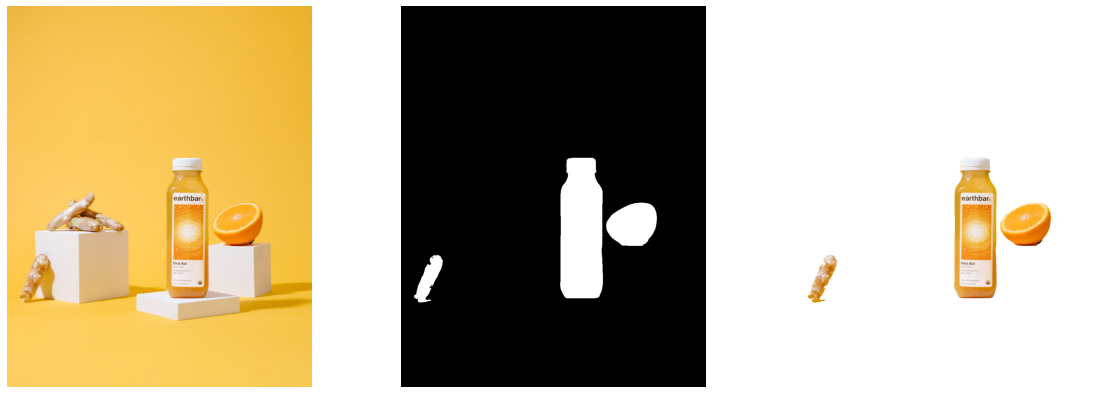

In [32]:
# Results Display 

# Resize the network result to the image shape and round the values
# to 0 (background) and 1 (foreground)
# Network result has shape (1,1,512,512), np.squeeze converts this to (512, 512)
resized_result = np.rint(
    cv2.resize(src=np.squeeze(result), dsize=(image.shape[1], image.shape[0]))
).astype(np.uint8)

# Creating a copy of the image and setting all background values to 255 (white)
bg_removed_result = image.copy()
bg_removed_result[resized_result == 0] = 255

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))
ax[0].imshow(image)
ax[1].imshow(resized_result, cmap="gray")
ax[2].imshow(bg_removed_result)
for a in ax:
    a.axis("off")

# Task 3 : Background Superimpose

In [33]:
!pip install pathlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


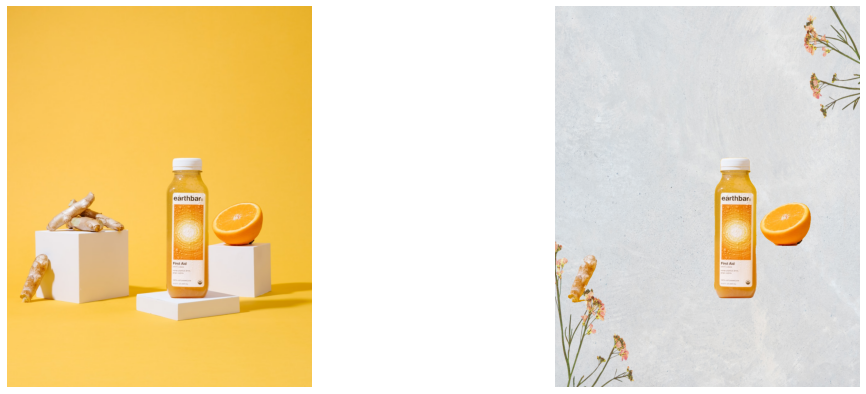

In [35]:
# Background Input for Superimposition
BACKGROUND_FILE = "/content/bg-01.png"
OUTPUT_DIR = "output"

os.makedirs(name=OUTPUT_DIR, exist_ok=True)

# Use cv.cvtColor and cv.imread function to change color space and read the image
background_image = cv2.cvtColor(src=cv2.imread(filename=BACKGROUND_FILE), code=cv2.COLOR_BGR2RGB)
# Use cv.resize function from OpenCV to resize the BG Image.
background_image = cv2.resize(src=background_image, dsize=(image.shape[1], image.shape[0]))

# Set all the foreground pixels from the result to 0
# in the background image and add the background-removed image
background_image[resized_result == 1] = 0
new_image = background_image + bg_removed_result

# Save the generated image
new_image_path = Path(f"{OUTPUT_DIR}/{IMAGE_PATH.stem}-{Path(BACKGROUND_FILE).stem}.png")
cv2.imwrite(filename=str(new_image_path), img=cv2.cvtColor(new_image, cv2.COLOR_RGB2BGR))

# Display the original image and the image with the new background side by side
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))
ax[0].imshow(image)
ax[1].imshow(new_image)
for a in ax:
    a.axis("off")
plt.show()
